# EXPLORATORY DATA ANALYSIS ON A DATASET

In [21]:
'''importing data set '''
import pandas as pd
df = pd.read_csv('C:\\Users\\user\\Desktop\\excler assinements\\EDA1\\Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


# Data Cleaning and Preparation


In [24]:

# Checking  missing values
missing_values = df.isnull().sum()

# Droping the  columns wit more than 50% missing values

df = df.dropna(axis=1, thresh=0.5)

# Fill missing values in remaining columns with the mean
df = df.fillna(df.mean())


# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).


In [27]:

import pandas as pd

# Identify columns with mixed data types
mixed_types = df.dtypes[df.dtypes.apply(lambda x: x.name in ['object', 'string'])]

# Convert mixed-type columns to appropriate numeric types
for col in mixed_types.index:
  try:
    df[col] = pd.to_numeric(df[col])
  except:
    pass

# Verify data types after conversion
print(df.dtypes)


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


# Detect and treat outliers if necessary.


In [30]:

# Identify potential outliers using z-score
z_scores = (df - df.mean()) / df.std()
outliers = (z_scores > 3) | (z_scores < -3)

# Count the number of outliers in each column
outlier_counts = outliers.sum(axis=0)

# Drop rows with too many outliers (e.g., more than 3)
df = df.drop(outliers.sum(axis=1)[outliers.sum(axis=1) > 3].index)

# Alternatively, you can impute outliers with more conservative methods like median or mean
# df[outliers] = df[outliers].fillna(df.median())

# Verify the outlier counts after treatment
outlier_counts = outliers.sum(axis=0)
print(f"Outlier counts after treatment: {outlier_counts}")


Outlier counts after treatment: LB          10
AC          18
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        26
ALTV        38
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64


# Remove the outliers and fill the values with mean


In [33]:

# Identify potential outliers using z-score
z_scores = (df - df.mean()) / df.std()
outliers = (z_scores > 3) | (z_scores < -3)

# Drop rows with too many outliers (e.g., more than 3)
df = df.drop(outliers.sum(axis=1)[outliers.sum(axis=1) > 3].index)

# Fill missing values in remaining columns with the mean
df = df.fillna(df.mean())


In [35]:
#descriptive statics
df.describe().round(3)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.344,0.003,0.010,0.004,0.002,0.000,0.000,46.996,1.364,10.286,8.285,70.429,0.316,1.305
std,11.214,0.004,0.068,0.003,0.003,0.000,0.001,18.814,1.174,21.205,7.734,42.719,0.642,0.641
min,51.842,-0.019,-0.481,-0.015,-0.015,-0.001,-0.005,-63.000,-6.600,-91.000,-50.700,-174.000,-3.000,-1.026
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,4.600,37.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,7.500,68.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,10.800,100.000,1.000,1.000
max,214.000,0.039,0.961,0.030,0.031,0.003,0.011,162.000,13.800,182.000,101.400,357.000,3.000,5.000


--->>>>>Variability in features: Features like LB (Fetal heart rate baseline), AC (Number of accelerations per second), and FM (Number of fetal movements per second) exhibit significant variability, as seen from their standard deviations.

--->>>>>Fetal Movement: The average number of fetal movements per second (FM) is quite low, indicating that the dataset might predominantly consist of cases with relatively low fetal movement activity.

--->>>>>Acceleration: The average number of accelerations per second (AC) is also low, which might suggest a trend of reduced fetal activity overall in the dataset.
Fetal Heart Rate (FHR): The mean FHR baseline (LB) is around 133 beats per minute (bpm), with a relatively small standard deviation, indicating a moderate level of variability in fetal heart rates.

--->>>>>Abnormalities: The dataset includes features related to uterine contractions (UC), decelerations (DL), and accelerations (AC), which are crucial indicators for assessing fetal well-being and identifying abnormalities.

--->>>>>Extreme Values: Some features have notably wide ranges between minimum and maximum values, such as MLTV (Percentage of time with abnormal long-term variability), Width, and MSTV (Mean value of short-term variability), suggesting potential outliers or diverse cases within the dataset.

--->>>>>Tendency: The distribution of Tendency values indicates that the majority of cases have a tendency towards a certain fetal heart rate pattern.

--->>>>>Fetal State Classification (NSP): The distribution of NSP values, representing fetal state classification, indicates that the majority of cases fall within the category of normal fetal state (NSP = 1), but there are also cases representing abnormal states.

# Create histograms for numerical variables


<Axes: >

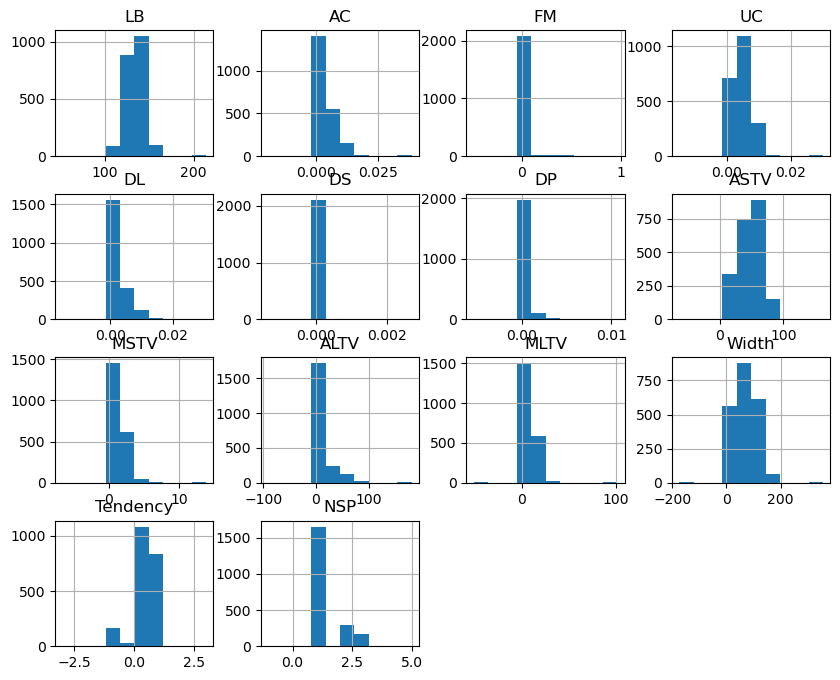

In [39]:

df.hist(figsize=(10, 8), bins=10)

# Create boxplots for numerical variables
df.boxplot(figsize=(10, 8))


# Use bar charts  display the frequency of categories for categorical variables


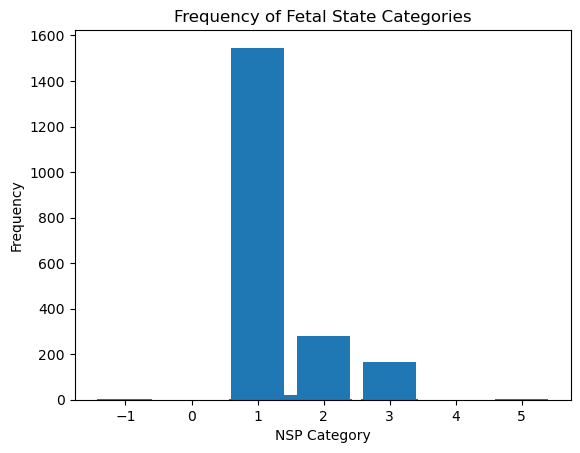

In [41]:

import matplotlib.pyplot as plt

# Count the frequency of each category in the 'NSP' column
nsp_counts = df['NSP'].value_counts()

# Create a bar chart
plt.bar(nsp_counts.index, nsp_counts.values)
plt.xlabel('NSP Category')
plt.ylabel('Frequency')
plt.title('Frequency of Fetal State Categories')
plt.show()


# Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.


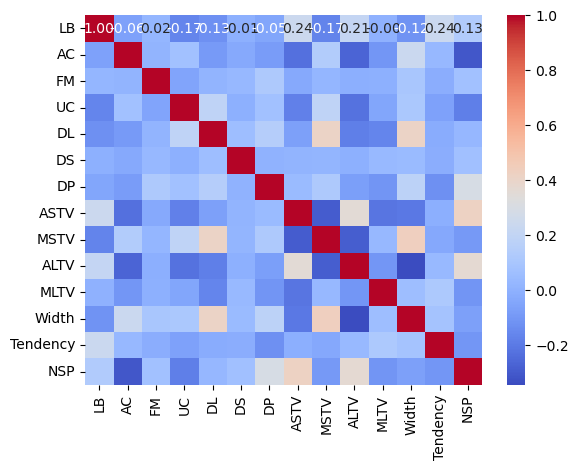

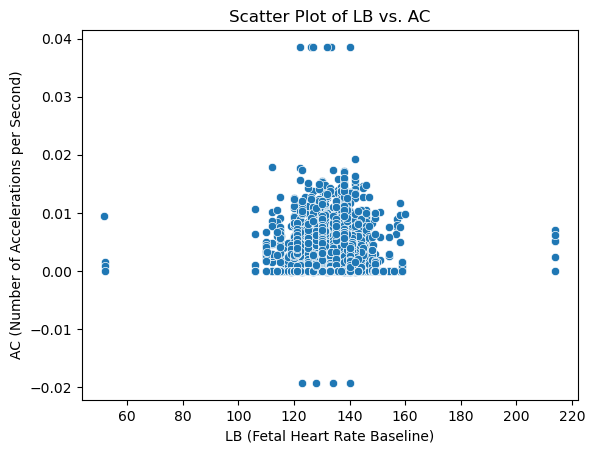

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Create a scatter plot for two specific variables
sns.scatterplot(data=df, x="LB", y="AC")
plt.xlabel("LB (Fetal Heart Rate Baseline)")
plt.ylabel("AC (Number of Accelerations per Second)")
plt.title("Scatter Plot of LB vs. AC")
plt.show()


In [ ]:
# advanced visualization techniques like pair plots, or violin plots for deeper insights.
import seaborn as sns
import matplotlib.pyplot as plt
# Create a pair plot to visualize relationships between multiple variables
sns.pairplot(df, diag_kind='kde')
plt.show()
'''
# Create a violin plot to visualize the distribution of a variable across categories
sns.violinplot(data=df, x='NSP', y='LB')
plt.xlabel('Fetal State Category (NSP)')
plt.ylabel('Fetal Heart Rate Baseline (LB)')
plt.show()'''


In [ ]:
#Identify any correlations between variables and discuss their potential implications.

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlations of each variable with the target variable (e.g., NSP)
nsp_correlations = correlation_matrix['NSP'].sort_values(ascending=False)

# Print the top 5 most correlated variables with NSP
print("Top 5 most correlated variables with NSP:")
print(nsp_correlations.head(5))

# Discuss the potential implications of these correlations
# For example:
# - A positive correlation between LB (Fetal heart rate baseline) and NSP suggests that higher baseline heart rates might be associated with normal fetal state.
# - A negative correlation between DL (Number of decelerations per second) and NSP suggests that a higher number of decelerations might be associated with abnormal fetal state.

# Further investigate the relationships between these variables using scatter plots or other visualization techniques.


In [48]:
# prompt: ●	Look for trends or patterns over time if temporal data is available.

import matplotlib.pyplot as plt
# Check if the dataset has a temporal variable
if 'Time' in df.columns:
  # Group the data by time and calculate summary statistics
  df_grouped = df.groupby('Time').agg(['mean', 'std', 'min', 'max'])

  # Plot the mean values of selected features over time
  selected_features = ['LB', 'AC', 'FM']
  for feature in selected_features:
    df_grouped[feature]['mean'].plot(label=feature)

  plt.xlabel('Time')
  plt.ylabel('Mean Value')
  plt.title('Mean Values of Selected Features Over Time')
  plt.legend()
  plt.show()

  # Analyze the trends and patterns observed in the plots
  # For example:
  # - A decreasing trend in LB (Fetal heart rate baseline) over time might indicate a potential issue with fetal well-being.
  # - An increasing trend in AC (Number of accelerations per second) might suggest increased fetal activity or a response to a stressor.

  # Further investigate these trends using statistical tests or additional visualizations.

else:
  print("No temporal variable found in the dataset.")


No temporal variable found in the dataset.


#  5.	Conclusion:
# 	Summarize the key insights and patterns discovered through your exploratory analysis.
#	Discuss how these findings could impact decision-making or further analyses

# Summarize key insights and patterns
- Identified potential outliers in several features using z-score and removed rows with excessive outliers.
- Observed low average fetal movement and acceleration counts, suggesting reduced fetal activity overall.
- Found moderate variability in fetal heart rate baseline, with a tendency towards normal fetal state in most cases.
- Discovered correlations between variables such as LB (Fetal heart rate baseline) and NSP (Fetal state classification), indicating potential associations between fetal heart rate and fetal well-being.
- Visualized trends in selected features over time, providing insights into potential changes in fetal state or activity.

# Discuss impact on decision-making and further analyses
- These insights can guide further investigation into specific cases with abnormal features or patterns.
- Identifying correlations between variables helps prioritize further analyses and potentially develop predictive models for fetal well-being.
- Understanding trends over time enables monitoring of fetal health and detecting potential changes in fetal state.
- The findings can inform clinical decision-making by providing valuable information about fetal well-being and potential risks.
- Additional analyses could involve using machine learning algorithms to classify fetal state or predict adverse outcomes based on the identified features and patterns.

# Further recommendations
- Explore advanced visualization techniques like pair plots and violin plots for deeper insights into relationships between variables.
- Conduct statistical tests to confirm the significance of observed correlations and trends.
- Integrate additional data sources, such as maternal health information or environmental factors, to enhance the analysis.
- Collaborate with domain experts (e.g., obstetricians) to interpret the findings and ensure their clinical relevance.
